In [56]:
import numpy as np
from sklearn.model_selection import train_test_split

In [57]:
!ls
#load data
data = np.loadtxt('housing.txt')
print(data.shape)

Boston-adaptive learning rate.ipynb
Boston-batch-adpative learning-l2-regularization.ipynb
Boston-batch-adpative learning.ipynb
Boston-batch.ipynb
boston-l2_regularization.ipynb
boston.ipynb
housing.names.txt
housing.txt
(506, 14)


In [58]:
#separate data into inputs and outputs
x = data[:,:13]
y = data[:,13]

print(x.shape)
print(y.shape)

(506, 13)
(506,)


In [59]:
#normalize inputs
#print(x.shape)
for i in range(x.shape[1]):
    #print(i)
    t = x[:,i]
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))


In [60]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(506, 14)


In [61]:
print(x[:5,:])

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 0.00000000e+00
  3.14814815e-01 5.77505269e-01 6.41606591e-01 2.69203139e-01
  0.00000000e+00 2.08015267e-01 2.87234043e-01 1.00000000e+00
  8.96799117e-02 1.00000000e+00]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 5.47997701e-01 7.82698249e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 1.00000000e+00
  2.04470199e-01 1.00000000e+00]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 0.00000000e+00
  1.72839506e-01 6.94385898e-01 5.99382080e-01 3.48961980e-01
  4.34782609e-02 1.04961832e-01 5.53191489e-01 9.89737254e-01
  6.34657837e-02 1.00000000e+00]
 [2.92795719e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.58555279e-01 4.41812564e-01 4.48544590e-01
  8.69565217e-02 6.67938931e-02 6.48936170e-01 9.94276060e-01
  3.33885210e-02 1.00000000e+00]
 [7.05070075e-04 0.00000000e+00 6.30498534e-02 0.00000000e+00
  1.50205761e-01 6.87104809e-01 5.28321318e-01 4.48544590e-01


In [62]:
xtr,xte,ytr,yte = train_test_split(x,y,test_size=0.3)
ytr = ytr.reshape(ytr.shape[0],1)
yte = yte.reshape(yte.shape[0],1)

In [63]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
print(w)
print(w.shape)

[[0.648609  ]
 [0.5919505 ]
 [0.20112586]
 [0.78743546]
 [0.69641893]
 [0.50160453]
 [0.66539931]
 [0.19294685]
 [0.97768249]
 [0.01664362]
 [0.45565001]
 [0.79657185]
 [0.69281871]
 [0.22428162]]
(14, 1)


In [64]:
#define hyper-parameters
epochs = 100
lamda = 0.00002
a = 0.2

In [65]:
#linear regression with constant learning rate 
train_acc = []
test_acc = []

m = xtr.shape[0]
n = xtr.shape[1]

mte = xte.shape[0]

for i in range(epochs):
    batch = 20
    for k in range(batch):
        
        l = m//batch
        if(k<batch-1):
            x_bar = xtr[k*l:k*l+l,:]
            y_bar = ytr[k*l:k*l+l,:]
            y_bar = y_bar.reshape(y_bar.shape[0],1)
        else:
            x_bar = xtr[k*l:,:]
            y_bar = ytr[k*l:,:]
            y_bar = y_bar.reshape(y_bar.shape[0],1)
            
        y_pred = np.dot(x_bar,w)
        mtr = x_bar.shape[0]
        #mse error in training set
        err = np.sum((y_pred - y_bar)**2)/(2*mtr)
        train_acc.append(err)

        #mse error in test set
        tmp = np.dot(xte,w)
        tmp_err = np.sum((tmp - yte)**2)/(2*mte)
        test_acc.append(tmp_err)

        #calculate gradient
        del_y = y_pred - y_bar

        for j in range(n):
            xcurr = x_bar[:,j]
            xcurr = xcurr.reshape(xcurr.shape[0],1)
            del_w = (sum(del_y[:]*xcurr[:]))/(mtr)
            #reduction factor
            rf = 1 + i/100
            w[j] = (1-lamda)*w[j] - (a/rf)*del_w

    if(i%10 == 0):
        print("Train Error", err)
        print("Test Error", tmp_err)

Train Error 7.94270033433046
Test Error 45.07777719914755
Train Error 5.241443966412271
Test Error 20.309133039051368
Train Error 4.952471190841268
Test Error 17.461940020279126
Train Error 5.01492105460835
Test Error 16.631597514858743
Train Error 5.104243081189984
Test Error 16.28393396729645
Train Error 5.187691740431439
Test Error 16.103614559114735
Train Error 5.2617080492537855
Test Error 15.997172766250934
Train Error 5.326141603288767
Test Error 15.929196416416074
Train Error 5.381503084570181
Test Error 15.88374356343327
Train Error 5.428572605126006
Test Error 15.852653712704383


<IPython.core.display.Javascript object>


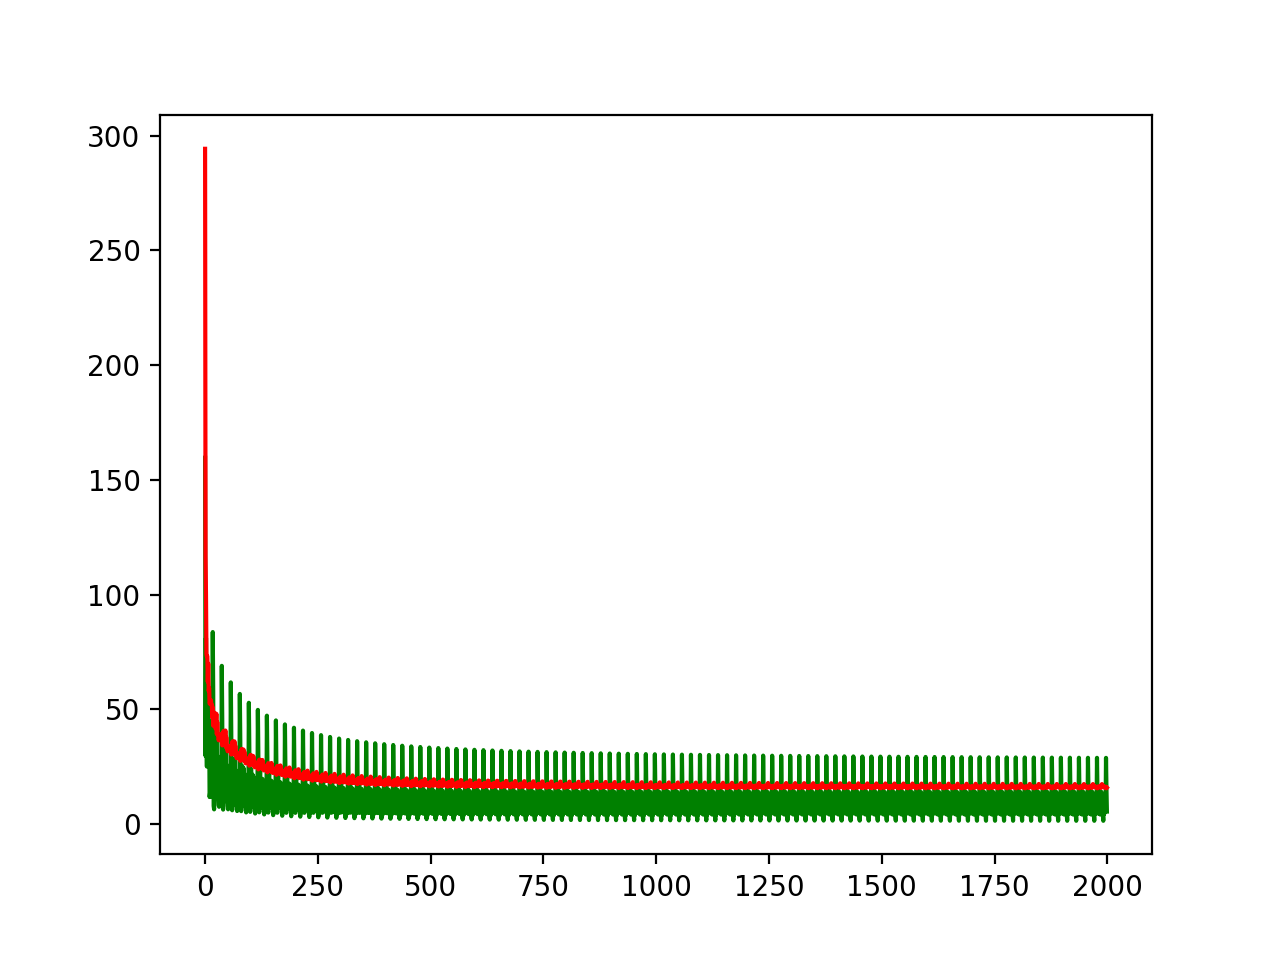

In [66]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib notebook
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()